In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import researchpy as rp
import sklearn

# Line graph of averages per month (Manila)

To get a rough overview of the changes in temperature in 2020 when compared to the average temperatures from 1998 to 2012 per month data from en.climate-data.org as basis.

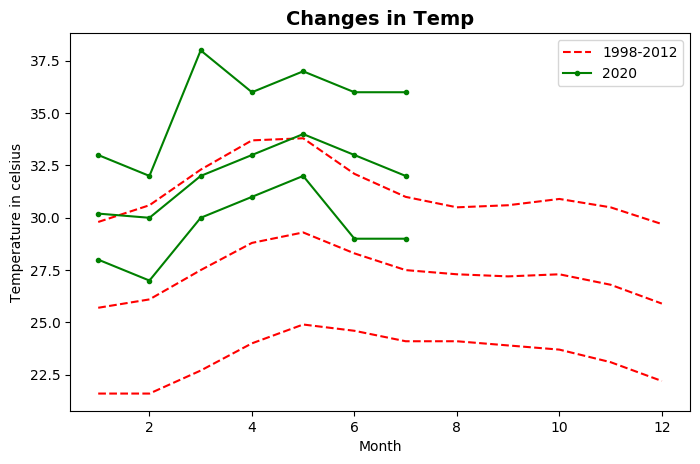

In [3]:
df=pd.read_csv('Manila-Weather-by-month-1982-2012.csv')
sdf=pd.read_csv('Manila-Weather-by-month-2020.csv')

plt.figure(figsize=(8,5),dpi=100)
plt.title('Changes in Temp',fontdict={'fontsize':14, 'fontweight':'bold'})

plt.plot(df.month, df['Avg T 1982-2012'],'r--',label='1998-2012')
plt.plot(df.month, df['Min T 1982-2012'],'r--')
plt.plot(df.month, df['Max T 1982-2012'],'r--')
plt.plot(sdf.month, sdf['Avg T 2020'],'g.-',label='2020')
plt.plot(sdf.month, sdf['Min T 2020'],'g.-')
plt.plot(sdf.month, sdf['Max T 2020'],'g.-')

plt.legend()

plt.xlabel('Month')
plt.ylabel('Temperature in celsius')

plt.show()

The graph above shows three lines of two colors; the green line for current 2020 and the red broken line for the average from 1998-2012. the upper line shows the maximum temperatures, the middle line for the average and the lower lines are for minimum temperatures.

# Daily Changes

For a more accurate representation, average daily temperatureData from 1998-2018 were used as comparison.

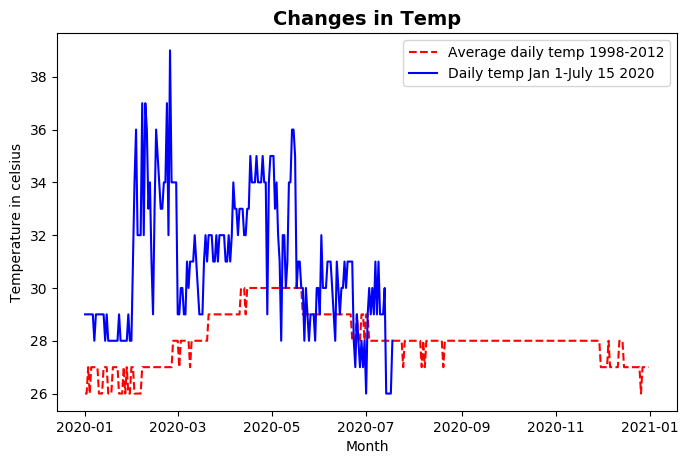

In [4]:
dp=pd.read_csv('1998-2018 temp data.csv')
dp['Date']=pd.to_datetime(dp['Date'])
dpr=pd.read_csv('2020 daily temp.csv')
dpr['Date']=pd.to_datetime(dpr['Date'])

plt.figure(figsize=(8,5),dpi=100)
plt.title('Changes in Temp',fontdict={'fontsize':14, 'fontweight':'bold'})


plt.plot(dp['Date'], dp['Temperature (°C)'],'r--',label='Average daily temp 1998-2012')
plt.plot(dpr['Date'], dpr['Temperature (°C)'],'b-',label='Daily temp Jan 1-July 15 2020')

plt.legend()

plt.xlabel('Month')
plt.ylabel('Temperature in celsius')


plt.show()

## smoothening the graph (weekly average)

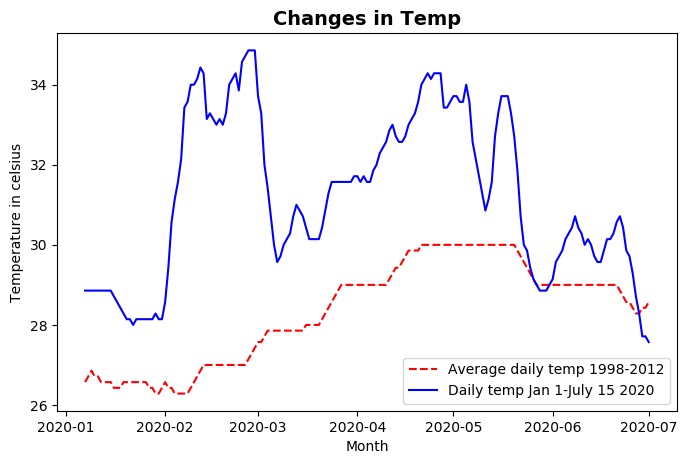

In [140]:
cut_off_date = "2020-07-18"
dp = dp.copy()
dpr = dpr.copy()
dp.sort_values('Date', ascending=True)
dpr.sort_values('Date', ascending=True)

dp= dp[dp['Date'] <= cut_off_date]
dpr= dpr[dpr['Date'] <= cut_off_date]

plt.figure(figsize=(8,5),dpi=100)
plt.title('Changes in Temp',fontdict={'fontsize':14, 'fontweight':'bold'})


plt.plot(dp['Date'], dp['Temperature (°C)'].rolling(window=7).mean(),'r--',label='Average daily temp 1998-2012')
plt.plot(dpr['Date'], dpr['Temperature (°C)'].rolling(window=7).mean(),'b-',label='Daily temp Jan 1-July 15 2020')

plt.legend()

plt.xlabel('Month')
plt.ylabel('Temperature in celsius')


plt.show()

To make the line smoother and the difference clearer to see, the Month-axis is shortened up to only the present. 

# Manila Heatmap

To visually show the distribution of heat 

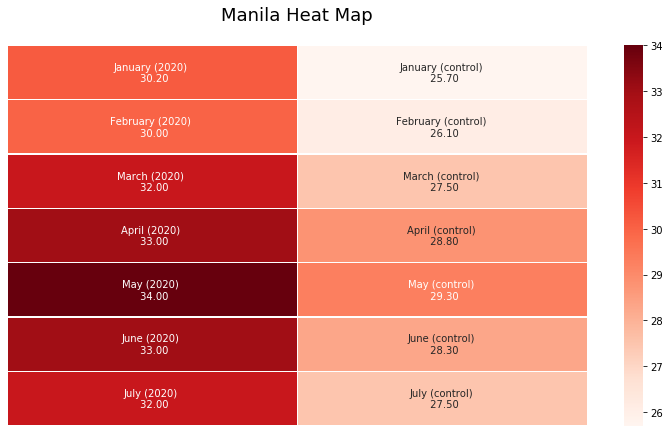

In [6]:
hf = pd.read_csv("Heatmap.csv")
symbol = ((np.asarray(hf['Symbol'])).reshape(7,2))
perchange = ((np.asarray(hf['Change'])).reshape(7,2))
labels = (np.asarray(["{0} \n {1:.2f}".format(symb,value)
                      for symb, value in zip(symbol.flatten(),
                                               perchange.flatten())])
         ).reshape(7,2)
fig, ax = plt.subplots(figsize=(13,7))
title = "Manila Heat Map"
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.axis('off')
sns.heatmap(perchange,annot=labels,fmt="",cmap='Reds',linewidths=0.30,ax=ax)
plt.show()

# Mean and Difference

In [7]:
a = df.copy()
b = sdf.copy()

together_df = pd.merge(a, 
                b,
                on= ['Manila Weather by Month '])
together_df = together_df.dropna(axis=0)
together_df
a=together_df['Avg T 1982-2012']
b=together_df['Avg T 2020']
cz=(b-a)
cy=np.mean(cz)
print('difference in monthly average (1998-2012 vs 2020) from January to July is \n',cz)
print('the mean of their difference is', cy)

difference in monthly average (1998-2012 vs 2020) from January to July is 
 0    4.5
1    4.5
2    4.2
3    4.7
4    4.7
5    4.5
dtype: float64
the mean of their difference is 4.516666666666667


This shows the amount of difference (in celsius) of temperatures in January-February2020 as compared to 1998-2012 data.

# T-test

For comparing multiple time series for their statistical difference, the T-test is used. The t test is one type of inferential statistics. It is used to determine whether there is a significant difference between the means of two groups. With all inferential statistics, we assume the dependent variable fits a normal distribution.

In [8]:
from scipy import stats

cut_off_date = "2020-07-1"
dp = dp.copy()
dpr = dpr.copy()
dp.sort_values('Date', ascending=True)
dpr.sort_values('Date', ascending=True)

dp= dp[dp['Date'] <= cut_off_date]
dpr= dpr[dpr['Date'] <= cut_off_date]

x1=dp['Temperature (°C)']
x2=dpr['Temperature (°C)']

t_result=stats.ttest_ind(x1,x2)
alpha= 0.05 

if (t_result[1] < alpha):
    print('2020 and past temperatures are significantly different')
t_result

2020 and past temperatures are significantly different


Ttest_indResult(statistic=-13.449312504047786, pvalue=9.360514248771768e-34)

# Machine Learning

the goal of this process is to create a predictive model for values and to acquire the Slope and Intercept values of the equation created in linear regression. 

In [182]:
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


xpr=pd.read_csv('2020 daily temp.csv')

B=np.array((xpr['Index']) )
A=np.array((xpr['Temperature (°C)']))

Y=A.reshape(-1, 1)
X=B.reshape(-1, 1)

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.1)
linear = linear_model.LinearRegression()
linear.fit(X_train, Y_train)
acc = linear.score(X_test, Y_test)
print(acc)

predictions = linear.predict(Y_test)

-0.10330599722684353


In [165]:
import pickle

best = acc
for _ in range(30):
    X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.1)
    linear = linear_model.LinearRegression()

    linear.fit(X_train, Y_train)
    acc = linear.score(X_test, Y_test)

    if acc > best:
        best = acc
        with open("TemperatureModel.pickle", "wb") as f:
            pickle.dump(linear, f)

In [196]:
pickle_in = open("TemperatureModel.pickle", "rb")
linear = pickle.load(pickle_in)

print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
M=(linear.coef_)
i=(linear.intercept_)

Coefficient: 
 [[-0.00413797]]
Intercept: 
 [31.30634065]


## Regression Line Plot

From the computed coefficient and intercept value from machine learning. The Regression line that shows the probable trend of the graph of "2020 daily temperatures" can now be compared to the trend of "1998-2018 average daily temperatures".

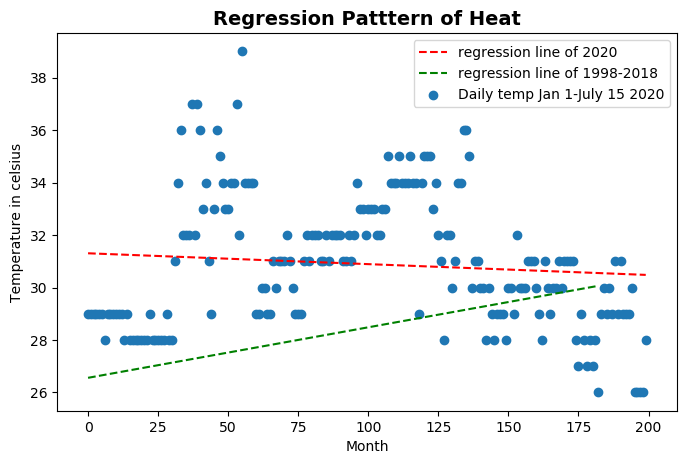

In [195]:
xdp= dp[dp['Date'] <= cut_off_date]

D=np.array((xdp['Index']) )
C=np.array((xdp['Temperature (°C)']))

plt.figure(figsize=(8,5),dpi=100)
plt.title('Regression Patttern of Heat',fontdict={'fontsize':14, 'fontweight':'bold'})

mx, bx = np.polyfit(D,C, 1)
plt.plot(X, M*X + i,'r--', label='regression line of 2020')
plt.plot(D, mx*D + bx,'g--', label='regression line of 1998-2018')
plt.scatter(xpr['Index'], xpr['Temperature (°C)'],label='Daily temp Jan 1-July 15 2020')

plt.legend()
plt.xlabel('Month')
plt.ylabel('Temperature in celsius')
plt.show()
